
# <span style="color:rgb(213,80,0)">This script generates Figure 9</span>

The figure is about the detection of departures from the correct degrees of freedom. It produces a boxplot reporting the rejection rates of the KS and AD testing procedures (based on the quantiles of Algorithm 1) when the degrees of freedom (\$\\nu = 5\$) is missspecified. as the sample size increases. The rejection rates are for trimming levels \$\\alpha_0 \\in {0.05, 0.10, 0.15, 0.20, 0.25}\$ and are computed from \$B=1000\$ samples, therefore the simulation can take a long time.


In [1]:

% set rep to 1000 to get meaninful results
rep           = 10;

my_v          = 5;
my_nu         = [3,4,5,6,7,20];
my_n          = [316 , 501 , 1001 , 2000];
alpha0_values = [0.025 0.05 0.10 0.15 0.20 0.25];
nu0_value     = 5 ;
nu0_shifts    = my_nu - nu0_value ; % must be = [-2 -1 0 1 2 15]

[out, out_S] = paper_Figure_9_test_nu0_departures(rep, my_n, my_v, alpha0_values, nu0_values, nu0_shifts);

data = out_S;

## power (boxplots)


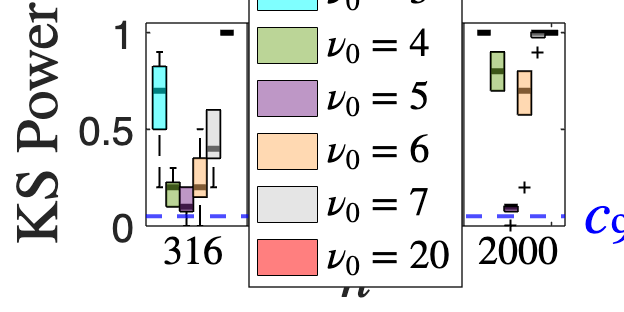


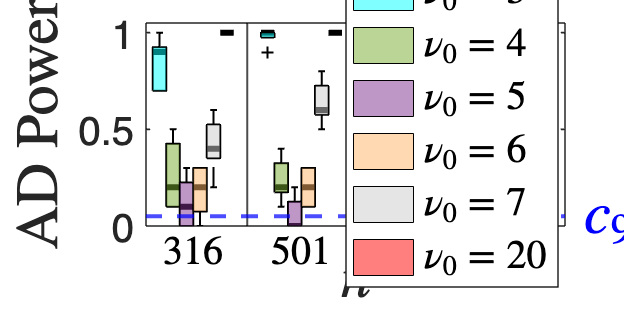

In [2]:
% choose interpolated=false to use the estimated values
interpolated = true;

for istat = 1:2

    if istat ==1
        statistic = 'KS';
    else
        statistic = 'AD';
    end

    clevel = 0.05;

    % graphics settings
    c1  = [0, 1, 1]; % violet
    c2  = [0.4660 0.6740 0.1880]; % green2
    c3  = [0.4940 0.1840 0.5560]; %'c';
    c4  = [1, 0.7, 0.4];
    c5  = [0.8, 0.8, 0.8];
    c6  = [1, 0, 0]; %'r'
    c7  = [0, 0, 1]; %'b'
    c8  = [0, 1, 0]; %'g'
    c9  = [1, 1, 0]; %'y';

    mycolors = [c1 ; c2 ; c3 ; c4 ; c5 ; c6 ; c7];
    stdfont = 20;

    % Get data for current combination of v , nu and n
    mask =  data.v   == my_v & ...
        any(data.nu_shifted  == my_nu , 2) & ...
        any(data.n == my_n , 2);
    data = data(mask, :);

    % do not consider cases with alpha0==0.025
    data = data(data.alpha0~=0.025,:);

    % Get unique values
    v_values      = unique(data.v);
    n_values      = unique(data.n);
    a0_values     = unique(data.alpha0);
    nu_shifted    = unique(data.nu_shifted);
    nu_true       = unique(data.nu_true);

    nv  = length(v_values);
    nn  = length(n_values);
    na0 = length(a0_values);
    nnu = length(nu_shifted);

    x_positions = repmat(ones(na0, 1) * nn , nn);

    % Create figure
    hfig=figure('Position', [100, 100, 1200, 600]);
    set(gca,'FontSize',stdfont); % ,'YAxisLocation','right'

    hold on
    pos  = 1;  % Position counter for boxplots
    Jpos = zeros(nn,1);

    for in = 1:nn  % For each n value

        for inu = 1:nnu

            % Get data for current combination
            mask =  data.n  == n_values(in) & ...
                data.nu_shifted == nu_shifted(inu);

            current_data   = data(mask, :);
            if interpolated
                if strcmp(statistic , 'KS')
                    current_data   = current_data.KSpval_int;
                else
                    current_data   = current_data.ADpval_int;
                end
            else       % use estimate statistics
                if strcmp(statistic , 'KS')
                    current_data   = current_data.KSpval_est;
                else
                    current_data   = current_data.ADpval_est;
                end
            end

            % Create boxplot
            hbox = boxplot(current_data, 'Positions', pos, 'Width', 1, ...
                'Colors', 'k', 'Symbol', 'k+');

            set(hbox,{'linew'},{1.0});
            medians = findobj(hbox, 'type', 'line', 'tag', 'Median');
            set(medians, 'LineWidth', 3);

            % Color the box based on n value
            h = findobj(gca, 'Tag', 'Box');
            if ~isempty(h)
                patch(get(h(1), 'XData'), get(h(1), 'YData'), mycolors(inu,:), 'FaceAlpha', 0.5);
            end
            pos = pos + 1;
        end

        xline(pos+0.5, '-k', 'LineWidth', 1, 'Color','k');

        % Add space between J groups
        Jpos(in) = pos-nnu;
        pos = pos + 2;

    end

    % Set y-axis limits
    ylim([0 1.05]);

    % Add true epsilon line
    yline(clevel, '--k', 'LineWidth', 2, 'Color','b');
    text(max(xlim)*1.03 , clevel, ' $c_{95}$ ','Interpreter','latex','FontSize',stdfont+10,'Color','b');

    % Customize plot
    %title([' $\epsilon_{0}$ = ' num2str(epsilon_true(ieps))],'Interpreter','latex','FontSize',stdfont+10,'Color','b');
    ylabel([statistic ' Power'],'Interpreter','latex','FontSize',stdfont+10);

    % Set x-axis labels
    %xticks((1:pos-3));
    xticklabels([]);

    % Add J value labels
    j_positions = Jpos + (nnu-1)/2  ;
    % xscale = round(log(n_values),1);
    xscale = n_values;
    text(j_positions, repmat(min(ylim), 1, length(n_values)), ...
        arrayfun(@(x) [num2str(x)], xscale, 'UniformOutput', false), ...
        'HorizontalAlignment', 'center', 'VerticalAlignment', 'top',...
        'Interpreter','latex','FontSize',stdfont);

    %xlabel(' $\log{n}$ ','Interpreter','latex','FontSize',stdfont+10);
    xlabel(' $n$ ','Interpreter','latex','FontSize',stdfont+10);

    % Adjust subplot spacing
    set(gcf, 'Color', 'w');
    box on;
    ax = gca;
    ax.LineWidth = 0.8;

    % Add legend
    theleg = arrayfun(@(n) sprintf(' $\\nu_0=%d$ ', n), nu_shifted, 'UniformOutput', false);
    legend(theleg, 'Location', 'eastoutside','Interpreter','latex','FontSize',stdfont,'Location','best'); %northeast

    % % data folder
    % out_path = './Fig9';
    % saveas(hfig,[out_path filesep statistic '_power_interpolated.fig'],'fig');
    % pause(0.5)
    % saveas(hfig,[out_path filesep statistic '_power_interpolated.eps'],'epsc');
    % pause(0.5)
    % saveas(hfig,[out_path filesep statistic '_power_interpolated.png'],'png');

end